<a href="https://colab.research.google.com/github/Nav2Nav/TP3/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow 
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import urllib.request
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img


In [5]:
from google.colab import drive
import os

# Accès Google Drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/cats_and_dogs/train"
path2 = "/content/gdrive/MyDrive/cats_and_dogs/test"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True, 
    vertical_flip=True,   
)

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',

    
)

Found 563 images belonging to 2 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [8]:
A=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30
)

Epoch 1/30
18/18 [==============================] - 66s 4s/step - loss: 1.0034 - accuracy: 0.5222
Epoch 2/30
18/18 [==============================] - 29s 2s/step - loss: 0.7200 - accuracy: 0.5027
Epoch 3/30
18/18 [==============================] - 30s 2s/step - loss: 0.6868 - accuracy: 0.6075
Epoch 4/30
18/18 [==============================] - 30s 2s/step - loss: 0.7053 - accuracy: 0.5808
Epoch 5/30
18/18 [==============================] - 30s 2s/step - loss: 0.6517 - accuracy: 0.6465
Epoch 6/30
18/18 [==============================] - 29s 2s/step - loss: 0.6435 - accuracy: 0.6465
Epoch 7/30
18/18 [==============================] - 29s 2s/step - loss: 0.6090 - accuracy: 0.6785
Epoch 8/30
18/18 [==============================] - 29s 2s/step - loss: 0.6055 - accuracy: 0.6679
Epoch 9/30
18/18 [==============================] - 30s 2s/step - loss: 0.6880 - accuracy: 0.7389
Epoch 10/30
18/18 [==============================] - 29s 2s/step - loss: 0.5609 - accuracy: 0.7123
Epoch 11/30
18/18 [

In [9]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_generator = train_datagen.flow_from_directory(
    path2,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',

)

Found 140 images belonging to 2 classes.


In [10]:
#preds = model.predict(test_generator)
loss, accuracy = model.evaluate(test_generator)

print('Loss on test set:', loss)
print('Accuracy on test set:', accuracy)

5/5 [==============================] - 22s 5s/step - loss: 0.9096 - accuracy: 0.6571
Loss on test set: 0.9095728993415833
Accuracy on test set: 0.6571428775787354


5/5 [==============================] - 5s 813ms/step


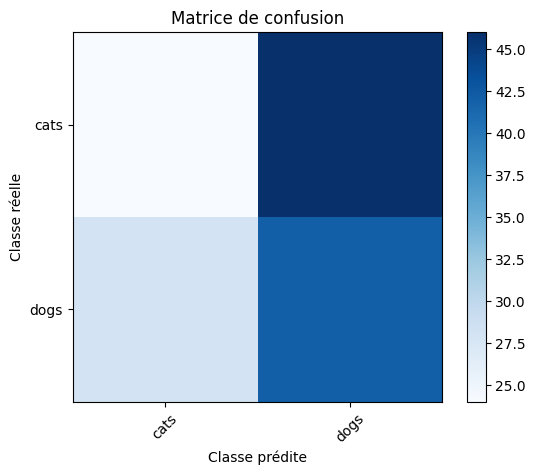

5/5 - 4s - loss: 0.9212 - accuracy: 0.6357 - 4s/epoch - 792ms/step
Accuracy sur les données de test : 0.6357142925262451


In [11]:
# Prédiction sur les données de test
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

# Affichage de la matrice de confusion
cm = confusion_matrix(test_generator.classes, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()

# Accuracy
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Accuracy :', test_acc)

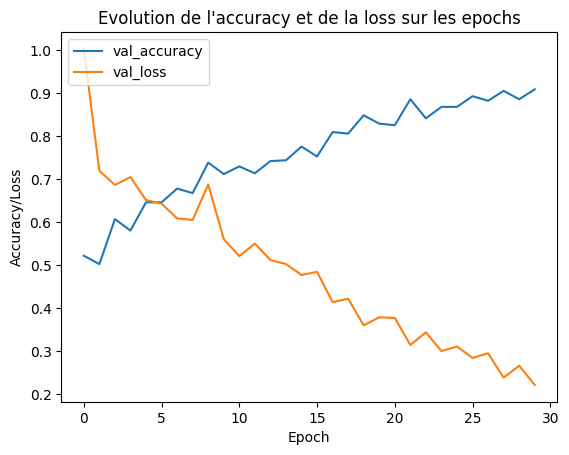

In [17]:
# Affichage de la courbe d'évolution de l'accuracy et de la loss sur les epochs
plt.plot(A.history['accuracy'])
plt.plot(A.history['loss'])
plt.title('Evolution de l\'accuracy et de la loss sur les epochs')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'val_loss', 'train_loss', 'val_loss'], loc='upper left')
plt.show()

In [27]:
# Lien de l'image à tester
image_url = "https://images.unsplash.com/photo-1608848461950-0fe51dfc41cb?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8M3x8fGVufDB8fHx8&w=1000&q=80"

# Téléchargement de l'image
urllib.request.urlretrieve(image_url, "test_image.jpg")
image_test = load_img("test_image.jpg", target_size=(150, 150))

# Conversion de l'image en tableau numpy
array_image_test = img_to_array(image_test)
image = np.expand_dims(array_image_test, axis=0)

# Normalisation de l'image
image_norm = image/255.0

# Certitude et prédiction
result = model.predict(image_norm)
print(result)
if result > 0.5:
    print("dog")
else:
    print("cat")

1/1 [==============================] - 0s 25ms/step
[[0.19407234]]
cat
